# Time-series analysis of the Normalised Difference Water Index (NDWI) from Sentinel-2 during the 2021 drought in Uttarakhand’s Terai region.

https://drive.google.com/drive/folders/1gr7VFy-IpUlFTNGf85r1T-_vJJOVnLFd?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#Google colab is connected with google drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#installing the libraries
!pip install rasterio
!pip install geopandas
!pip install rasterstats
!pip install earthengine-api
!pip install requests
!pip install sentinelsat


# import libraries
import json
import geopandas as gpd
import matplotlib.pyplot as plt
import math
import numpy as np
from osgeo import gdal, ogr
import os
from os import listdir
from os.path import isfile, isdir, join
import pandas as pd
from pprint import pprint
import rasterio
from rasterio import plot
from rasterio.plot import show_hist
from scipy import optimize
import shutil
import sys
import zipfile
import requests
import io
import webbrowser
import ee
import imageio



#Path location of the colab Notebooks in the drive

libdir = '/content/drive/MyDrive/Colab Notebooks/Course_work1' # this is where pygge.py needs to be saved
if libdir not in sys.path:
    sys.path.append(libdir)

# The pygge module is imported and stored in the drive and connected with the colabnotebook
import pygge

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Earth engine is accesed 


In [ ]:
#Earth engine is accessed through the web browser and the verification code is entered to get the sentinal 2 images.
!earthengine authenticate

ee.Initialize()

## copied the code from the Practical 5 notes

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=uuuPwiHVM_0FAoM945YMbGtHi826cm1Zdu2LEOFVxzU&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AX4XfWjYSt-iaGWIY5rHLqU_VPJw6AXqWCw__2tSQPxnij8ZB1NLYAOEyt0

Successfully saved authorization token.


In [ ]:
#setting the directory for the satillte data 

wd = "/content/drive/MyDrive/Colab Notebooks/Course_work1"
print("Connected to data directory: " + wd)


Connected to data directory: /content/drive/MyDrive/Colab Notebooks/Course_work1


In [ ]:
cd = "/content/work"
downloaddirectory = join(cd, 'download')

try:
  shutil.rmtree(downloaddirectory)
except:
  print(downloaddirectory + " not found.")


/content/work/download not found.


In [ ]:
os.makedirs(cd, exist_ok=True)
os.makedirs(downloaddirectory, exist_ok=True)
print("Connected to Google Colab temporary data directory: " + cd)

print("\nList of contents of " + wd)
for f in sorted(os.listdir(wd)):
  print(f)

Connected to Google Colab temporary data directory: /content/work

List of contents of /content/drive/MyDrive/Colab Notebooks/Course_work1
Course_work1.ipynb
Uttarakhad_shapefile
__pycache__
download
pygge.py


Uttarakhad shapefile is obtained from the geojson and stored into the google drive

In [ ]:
shapefile = join(wd,  'Uttarakhad_shapefile', 'POLYGON.shp')
datefrom = '2021-07-01' # start date 
dateto   = '2021-09-30' # end date 
time_range = [datefrom, dateto]
clouds = 10 

In [ ]:
extent, outSpatialRef, epsg = pygge.get_shp_extent(shapefile)
print("Extent of the area of interest (shapefile):\n", extent)
print(type(extent))
print("\nCoordinate referencing system (CRS) of the shapefile:\n", outSpatialRef)
print('EPSG code: ', epsg)

## Modified the code from the Practical 6 notes

Extent of the area of interest (shapefile):
 (78.7968635559082, 78.85934829711914, 29.25667504164292, 29.298675240252063)
<class 'tuple'>

Coordinate referencing system (CRS) of the shapefile:
 GEOGCS["GCS_WGS_1984",
    DATUM["WGS_1984",
        SPHEROID["WGS_84",6378137,298.257223563]],
    PRIMEM["Greenwich",0],
    UNIT["Degree",0.017453292519943295],
    AUTHORITY["EPSG","4326"]]
EPSG code:  4326


The Extent list is printed.

In [ ]:
extent_list = list(extent)
print(extent_list)

[78.7968635559082, 78.85934829711914, 29.25667504164292, 29.298675240252063]


In [ ]:
area_list = list([(extent[0], extent[2]),(extent[1], extent[2]),(extent[1], extent[3]),(extent[0], extent[3]),(extent[0], extent[2])])
print(area_list)

search_area = ee.Geometry.Polygon(area_list)
print(search_area)

## Modified the code from the Practical 6 notes

[(78.7968635559082, 29.25667504164292), (78.85934829711914, 29.25667504164292), (78.85934829711914, 29.298675240252063), (78.7968635559082, 29.298675240252063), (78.7968635559082, 29.25667504164292)]
ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              78.7968635559082,
              29.25667504164292
            ],
            [
              78.85934829711914,
              29.25667504164292
            ],
            [
              78.85934829711914,
              29.298675240252063
            ],
            [
              78.7968635559082,
              29.298675240252063
            ],
            [
              78.7968635559082,
              29.25667504164292
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})


Band 3 and Band 8 are the two bands which are used to find the NDWI.

In [ ]:
s2collection = ('COPERNICUS/S2')
s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)


bands = ['B3', 'B8']
print(bands)
resolution = 20

## Modified the code from the Practical 6 notes

['B3', 'B8']


In [ ]:
s2collection = ('COPERNICUS/S2')
print("Image collection: ", s2collection)

# The needed bands are selected
bands = ['B3', 'B8']
print(bands)

resolution = 320 # in units of metres
print("resolution: ", resolution)
#  Sentinel-2 image is collected within the time range
s2collect = pygge.obtain_image_collection_sentinel(s2collection, time_range, search_area, clouds).select(bands)
search_region = pygge.get_region(search_area)

## Modified the code from the Practical 6 notes

Image collection:  COPERNICUS/S2
['B3', 'B8']
resolution:  320


In [ ]:
s2aoi = s2collect.getRegion(search_area, resolution).getInfo()
s2aoi[:4]

[['id', 'longitude', 'latitude', 'time', 'B3', 'B8'],
 ['20211003T051701_20211003T052600_T44RKT',
  78.79689295641319,
  29.256781330846636,
  None,
  0.1167,
  0.2601],
 ['20211008T051709_20211008T053004_T44RKT',
  78.79689295641319,
  29.256781330846636,
  None,
  0.3588,
  0.4662],
 ['20211013T051751_20211013T052103_T44RKT',
  78.79689295641319,
  29.256781330846636,
  None,
  0.0914,
  0.2412]]

In [ ]:
df = pygge.ee_array_to_df(s2aoi,['longitude', 'latitude', 'B3', 'B8'])

# Calculating the NDWI from B3 and B8 bands
df['ndwi'] =  (df['B3'] - df['B8']) / (df['B3'] + df['B8'])
df = df.dropna(0)

print(df)
print(df.iloc[0])

## Modified the code from the Practical 6 notes

0           date                                      id  longitude  \
0       20211003  20211003T051701_20211003T052600_T44RKT  78.796893   
1       20211008  20211008T051709_20211008T053004_T44RKT  78.796893   
2       20211013  20211013T051751_20211013T052103_T44RKT  78.796893   
3       20211023  20211023T051901_20211023T052038_T44RKT  78.796893   
4       20211028  20211028T051929_20211028T052925_T44RKT  78.796893   
...          ...                                     ...        ...   
407155  20211003  20211003T051701_20211003T052600_T44RKT  78.859236   
407156  20211008  20211008T051709_20211008T053004_T44RKT  78.859236   
407157  20211013  20211013T051751_20211013T052103_T44RKT  78.859236   
407158  20211023  20211023T051901_20211023T052038_T44RKT  78.859236   
407159  20211028  20211028T051929_20211028T052925_T44RKT  78.859236   

0        latitude      B3      B8      ndwi  
0       29.256781  0.1167  0.2601 -0.380573  
1       29.256781  0.3588  0.4662 -0.130182  
2       2

/content/drive/MyDrive/Colab Notebooks/Course_work1/pygge.py:423: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna(0)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


In [ ]:
#Printing the type of Date and NDWI
print(type(df['date']))
print(type(df['date'].iloc[0]))
print(df['date'])

print(type(df['ndwi']))
print(type(df['ndwi'].iloc[0]))
print(df['ndwi'])

<class 'pandas.core.series.Series'>
<class 'str'>
0         20211003
1         20211008
2         20211013
3         20211023
4         20211028
            ...   
407155    20211003
407156    20211008
407157    20211013
407158    20211023
407159    20211028
Name: date, Length: 407160, dtype: object
<class 'pandas.core.series.Series'>
<class 'numpy.float64'>
0        -0.380573
1        -0.130182
2        -0.450391
3        -0.345591
4        -0.398570
            ...   
407155   -0.195870
407156   -0.075578
407157   -0.439435
407158   -0.254803
407159   -0.269852
Name: ndwi, Length: 407160, dtype: float64


In [ ]:
#Julian date
jd = [] 
for t in range(len(df['date'].iloc[:])): 

  y,m,d = pygge.split_YYYYMMDD(df['date'].iloc[t])
  jd.append(pygge.julian_date(y,m,d))

df.insert(0, "JD", jd, True)
# The Julian date list is added to the dataframe as the new column

print(df.head())

## Modified the code from the Practical 6 notes

0       JD      date                                      id  longitude  \
0  2459491  20211003  20211003T051701_20211003T052600_T44RKT  78.796893   
1  2459496  20211008  20211008T051709_20211008T053004_T44RKT  78.796893   
2  2459501  20211013  20211013T051751_20211013T052103_T44RKT  78.796893   
3  2459511  20211023  20211023T051901_20211023T052038_T44RKT  78.796893   
4  2459516  20211028  20211028T051929_20211028T052925_T44RKT  78.796893   

0   latitude      B3      B8      ndwi  
0  29.256781  0.1167  0.2601 -0.380573  
1  29.256781  0.3588  0.4662 -0.130182  
2  29.256781  0.0914  0.2412 -0.450391  
3  29.256781  0.1050  0.2159 -0.345591  
4  29.256781  0.0925  0.2151 -0.398570  


In [ ]:
print(df.columns)
print(df['longitude'])
print(df['latitude'])
print(type(df['latitude'].iloc[0]))

# getting the combinations of latitude and longitude for each pixel and storing  in a dataframe
pixel_ids = []

for t in range(len(df['date'].iloc[:])): # time index
  lon = df['longitude'].iloc[t]
  lat = df['latitude'].iloc[t]
  pixel_ids.append(str(lon)+'_'+str(lat))

df.insert(1, "lon_lat", pixel_ids, True)

print(df.columns)

## Modified the code from the Practical 6 notes

Index(['JD', 'date', 'id', 'longitude', 'latitude', 'B3', 'B8', 'ndwi'], dtype='object', name=0)
0         78.796893
1         78.796893
2         78.796893
3         78.796893
4         78.796893
            ...    
407155    78.859236
407156    78.859236
407157    78.859236
407158    78.859236
407159    78.859236
Name: longitude, Length: 407160, dtype: float64
0         29.256781
1         29.256781
2         29.256781
3         29.256781
4         29.256781
            ...    
407155    29.298643
407156    29.298643
407157    29.298643
407158    29.298643
407159    29.298643
Name: latitude, Length: 407160, dtype: float64
<class 'numpy.float64'>
Index(['JD', 'lon_lat', 'date', 'id', 'longitude', 'latitude', 'B3', 'B8',
       'ndwi'],
      dtype='object', name=0)


In [ ]:

search_region = pygge.get_region(search_area)
s2url = pygge.get_url('s2', s2median.select(bands), resolution, search_region, filePerBand=False)
print(s2url)

## Modified the code from the Practical 5 notes

https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/f94489cb5fe37cbd441368160cd3a9d0-db0e8ec533e277d0904ebea7534ae3a1:getPixels


In [ ]:
# changing directory to download directory
os.chdir(downloaddirectory)

# request information on the file to be downloaded
f = pygge.requests.get(s2url, stream =True)

# check whether it is a zip file
check = zipfile.is_zipfile(io.BytesIO(f.content))

# either download the file as is, or unzip it
while not check:
    f = requests.get(s2url, stream =True)
    check = zipfile.is_zipfile(io.BytesIO(f.content))
else:
    z = zipfile.ZipFile(io.BytesIO(f.content))
    z.extractall()

  ## Modified the code from the Practical 5 notes

In [ ]:
os.chdir(downloaddirectory)
print("Details of ", downloaddirectory, ":")
!ls -l

Details of  /content/work/download :
total 8120
-rw-r--r-- 1 root root 419606 Apr  3 21:01 movie.gif
-rw-r--r-- 1 root root 330817 Apr  3 20:52 s2_month001.tif
-rw-r--r-- 1 root root 328708 Apr  3 20:56 s2_month001_warped_ndwi.tif
-rw-r--r-- 1 root root  82447 Apr  3 20:56 s2_month001_warped_ndwi_uint8.tif
-rw-r--r-- 1 root root 657206 Apr  3 20:55 s2_month001_warped.tif
-rw-r--r-- 1 root root 327673 Apr  3 20:52 s2_month002.tif
-rw-r--r-- 1 root root 328708 Apr  3 20:56 s2_month002_warped_ndwi.tif
-rw-r--r-- 1 root root  82447 Apr  3 20:56 s2_month002_warped_ndwi_uint8.tif
-rw-r--r-- 1 root root 657206 Apr  3 20:55 s2_month002_warped.tif
-rw-r--r-- 1 root root 165445 Apr  3 20:52 s2_month003.tif
-rw-r--r-- 1 root root 328708 Apr  3 20:56 s2_month003_warped_ndwi.tif
-rw-r--r-- 1 root root  82447 Apr  3 20:56 s2_month003_warped_ndwi_uint8.tif
-rw-r--r-- 1 root root 657206 Apr  3 20:55 s2_month003_warped.tif
-rw-r--r-- 1 root root 350641 Apr  3 20:53 s2_month004.tif
-rw-r--r-- 1 root roo

In [ ]:
allfiles = [f for f in listdir(downloaddirectory) if isfile(join(downloaddirectory, f))]
print(allfiles)

thisfile = allfiles[0]
print(thisfile)

## Modified the code from the Practical 5 notes

['s2_month005.tif', 's2_month005_warped_ndwi_uint8.tif', 's2_month001_warped_ndwi_uint8.tif', 's2_month005_warped.tif', 's2_month003_warped_ndwi.tif', 's2_month003_warped.tif', 's2.tif', 's2_month002_warped.tif', 's2_month005_warped_ndwi.tif', 's2_month002_warped_ndwi.tif', 's2_month002.tif', 's2_month001.tif', 's2_month002_warped_ndwi_uint8.tif', 's2_month004_warped.tif', 's2_month001_warped_ndwi.tif', 's2_month003_warped_ndwi_uint8.tif', 'movie.gif', 's2_month004_warped_ndwi_uint8.tif', 's2_month004.tif', 's2_month003.tif', 's2_month001_warped.tif', 's2_month004_warped_ndwi.tif', 's2_warped.tif']
s2_month005.tif


Reprojecting the image to EPSG projection

In [ ]:

print("Reprojecting image to EPSG projection ", epsg)

warpfile = thisfile.split(sep='.')[0] + '_warped.tif'
print("We are in this directory: ")
!pwd
print("Input file: ", thisfile)
print("Output file: ", warpfile)

tmp = pygge.easy_warp(thisfile, warpfile, epsg)

## Modified the code from the Practical 6 notes

Reprojecting image to EPSG projection  4326
We are in this directory: 
/content/work/download
Input file:  s2_month005.tif
Output file:  s2_month005_warped.tif
s2_month005_warped.tif already exists. Skipping this command.


The monthly image composites are acquired.

In [ ]:
os.chdir(downloaddirectory)

# All date ranges for the new searches are entered within a list of lists
months = [['2021-06-01', '2021-06-30'],
          ['2021-07-01', '2021-07-31'],
          ['2021-08-01', '2021-08-31'],
          ['2021-09-01', '2021-09-30'],
          ['2021-10-01', '2021-10-31']]

clouds = 30
bands = ['B3', 'B8']

resolution = 20 # in units of metres

# iterate over each months
for month in range(len(months)):
  time_range = months[month]
  print(time_range)

  # Searching on Google Earth Engine
  s2median = pygge.obtain_image_sentinel(s2collection, time_range, search_area, clouds)
  band_names = s2median.bandNames().getInfo()


  if len(band_names) == 0:
    print("Search returned no results.")

  else: 
    print(band_names)

  
    file_id = 's2_month'
    
    s2url = pygge.get_url(file_id+str(month+1).zfill(3), s2median.select(bands), resolution, search_region, filePerBand=False)
    print(s2url)

    # requesting the information on the file to be downloaded
    f = pygge.requests.get(s2url, stream =True)

  
    check = zipfile.is_zipfile(io.BytesIO(f.content))

  
    while not check:
        f = pygge.requests.get(s2url, stream =True)
        check = zipfile.is_zipfile(io.BytesIO(f.content))
    else:
        z = zipfile.ZipFile(io.BytesIO(f.content))
        z.extractall()

# Getting a list of all files which need to be warpped

allfiles = [f for f in listdir(downloaddirectory) if isfile(join(downloaddirectory, f))]
files_for_warp = [s for s in allfiles if file_id in s]

print("Files with file ID ", file_id, " for warping:")
pprint(sorted(files_for_warp))

## Modified the code from the Practical 5 notes


['2021-06-01', '2021-06-30']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/af8eb6d2cce2838f261d06e5f5cac331-130431c628223731e95b544460a47e7f:getPixels
['2021-07-01', '2021-07-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/4b996f39a14202b3027c4e3b1d548547-8ad6215a4fa91c8c00e171fc8bc1a1ed:getPixels
['2021-08-01', '2021-08-31']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60']
https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/8a36843ed3603460a68d1f54cdd6c55f-9d11120342e724a4ba78a8076c668605:getPixels
['2021-09-01', '2021-09-30']
['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B9', 'B10', 'B11', 'B12', 'QA10'

In [ ]:
from rasterio import transform
uint8files = []

# warpping them all
for f in sorted(files_for_warp):
  warpfile = f.split('.')[0]+'_warped.tif'
  ndwifile = f.split('.')[0]+'_warped_ndwi.tif'
  uint8file = f.split('.')[0]+'_warped_ndwi_uint8.tif'
 
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpfile, epsg)

  reference_rast = rasterio.open(warpfile) 
  ndwi = rasterio.open(ndwifile, 'w', width=reference_rast.width,
                       height=reference_rast.height, count = 1, crs=reference_rast.crs,
                       transform=reference_rast.transform, dtype=np.float32)
  ndwi_arr = (reference_rast.read(1) - reference_rast.read(2)) / (reference_rast.read(1) + reference_rast.read(2))
  ndwi.write(ndwi_arr, 1)
  ndwi.close()

  print("Converting raster file " + ndwifile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(ndwifile, uint8file, np.uint8, percentiles=[0,98])
  uint8files.append(uint8file)
  print(f)

  ## Modified the code from the Practical 5 notes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Warping raster file s2_month001.tif
Creating warped file:s2_month001_warped.tif
Converting raster file s2_month001_warped_ndwi.tif to 8-bit unsigned integer data type.
s2_month001.tif
Warping raster file s2_month002.tif
Creating warped file:s2_month002_warped.tif
Converting raster file s2_month002_warped_ndwi.tif to 8-bit unsigned integer data type.
s2_month002.tif
Warping raster file s2_month003.tif
Creating warped file:s2_month003_warped.tif
Converting raster file s2_month003_warped_ndwi.tif to 8-bit unsigned integer data type.
s2_month003.tif
Warping raster file s2_month004.tif
Creating warped file:s2_month004_warped.tif
Converting raster file s2_month004_warped_ndwi.tif to 8-bit unsigned integer data type.
s2_month004.tif
Warping raster file s2_month005.tif
Creating warped file:s2_month005_warped.tif
Converting raster file s2_month005_warped_ndwi.tif to 8-bit unsigned integer data type.
s2_month005.tif


Getting all images into the same projection as the shapefile.

Warping raster file s2_month001.tif
s2_month001_warped.tif already exists. Skipping this command.
Converting raster file s2_month001_warped_ndwi.tif to 8-bit unsigned integer data type.
Warping raster file s2_month002.tif
s2_month002_warped.tif already exists. Skipping this command.
Converting raster file s2_month002_warped_ndwi.tif to 8-bit unsigned integer data type.
Warping raster file s2_month003.tif
s2_month003_warped.tif already exists. Skipping this command.
Converting raster file s2_month003_warped_ndwi.tif to 8-bit unsigned integer data type.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Warping raster file s2_month004.tif
s2_month004_warped.tif already exists. Skipping this command.
Converting raster file s2_month004_warped_ndwi.tif to 8-bit unsigned integer data type.
Warping raster file s2_month005.tif
s2_month005_warped.tif already exists. Skipping this command.
Converting raster file s2_month005_warped_ndwi.tif to 8-bit unsigned integer data type.
Files after warping:
['s2_month001_warped_ndwi.tif',
 's2_month002_warped_ndwi.tif',
 's2_month003_warped_ndwi.tif',
 's2_month004_warped_ndwi.tif',
 's2_month005_warped_ndwi.tif']
Files after conversion to uint8 data type:
['s2_month001_warped_ndwi_uint8.tif',
 's2_month002_warped_ndwi_uint8.tif',
 's2_month003_warped_ndwi_uint8.tif',
 's2_month004_warped_ndwi_uint8.tif',
 's2_month005_warped_ndwi_uint8.tif']


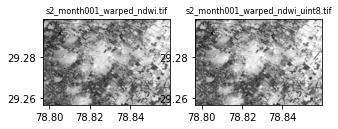

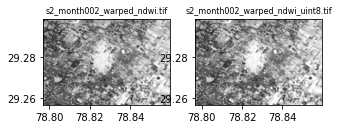

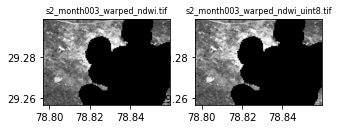

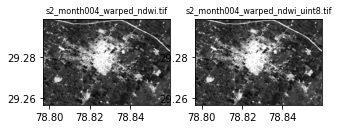

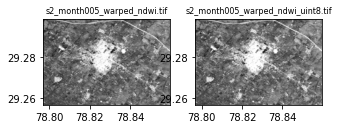

In [ ]:
uint8files = []

# plotting all ndwi files
for f in sorted(files_for_warp):
  # make a file name for our new files
  warpfile = f.split('.')[0]+'_warped.tif'
  ndwifile = f.split('.')[0]+'_warped_ndwi.tif'
  uint8file = f.split('.')[0]+'_warped_ndwi_uint8.tif'
  # call the easy_warp function
  print("Warping raster file " + f)
  pygge.easy_warp(f, warpfile, epsg)

  reference_rast = rasterio.open(warpfile) 
  ndwi = rasterio.open(ndwifile, 'w', width=reference_rast.width,
                       height=reference_rast.height, count = 1, crs=reference_rast.crs,
                       transform=reference_rast.transform, dtype=np.float32)
  ndwi_arr = (reference_rast.read(1) - reference_rast.read(2)) / (reference_rast.read(1) + reference_rast.read(2))
  ndwi.write(ndwi_arr, 1)
  ndwi.close()

  print("Converting raster file " + ndwifile + " to 8-bit unsigned integer data type.")
  pygge.convert_to_dtype(ndwifile, uint8file, np.uint8, percentiles=[0,98])
  uint8files.append(uint8file)


  fig, ax = plt.subplots(1,2, figsize=(5,2.5))
  fig.patch.set_facecolor('white')
  pygge.easy_plot(ndwifile, ax=ax[0], bands=[1,1,1], percentiles=[0,99], title=ndwifile)
  pygge.easy_plot(uint8file, ax=ax[1], bands=[1,1,1], percentiles=[0,99], title=uint8file)
  
#Getting a list of all warped tiff files 
allfiles = [f for f in listdir(downloaddirectory) if isfile(join(downloaddirectory, f))]
warpfiles = [s for s in allfiles if "_warped_ndwi.tif" in s]

print("Files after warping:")
pprint(sorted(warpfiles))

print("Files after conversion to uint8 data type:")
pprint(sorted(uint8files))

## Modified the code from the Practical 5 notes

In [ ]:
np.nanmean(rasterio.open(warpfiles[0]).read(1))

-0.3485973

##Time series analysis of NDWI

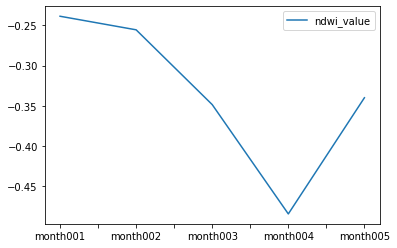

In [ ]:
# timeseries analysis of normalised difference water index (NDWI) from June 2021 to october 2021

timeseries_df = pd.DataFrame()

for f in sorted(warpfiles):
  timeseries_df.loc[f.split('_')[1], 'ndwi_value'] = np.nanmean(rasterio.open(f).read(1))

timeseries_df.plot()

# There is a great decrease in the 4th month it may be because of the water index

##Using the series of images from month June 2021 to October 2021 a Map is produced.


In [ ]:
#Saving the images files into a movie gif
images = []

for f in sorted(uint8files):
  images.append(imageio.imread(f)) # read the next image and append it

# setting the frame rate in seconds
framerate = { 'duration': 4 }

# save the movie
imageio.mimsave(join(downloaddirectory, "movie.gif"), images, **framerate)

## Modified the code from the Practical 5 notes

##The time series of sentinel-2 images covering fro  july2021 to october 2021 and NDWI is calculated and produced a movie of NDWI maps.The area which is impacted more from the drought is the regions of Udam singh Nagar in the Terai regions of Uttarakhad. From the month wise months we can clearly see the normalised water index.
